In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path="/content/drive/MyDrive/Flower Classification/Train"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Define hyperparameters
batch_size = 40
img_height = 256
img_width = 256
dropout_rate = 0.2

#Tasks and Marks Division-CNN

###Data Understanding, Analysis, Visualization and Cleaning[5]: 


How many total images are in the dataset?

In [ ]:
# Initialize a variable to store the total number of images
total_images = 0

# Iterate over the directory and its subdirectories
for root, dirs, files in os.walk(data_path):
    # Count the number of files in each directory
    num_files = len(files)
    # Add the number of files to the total_images variable
    total_images += num_files

# Print the total number of images
print("Total number of images:", total_images)


Total number of images: 4312


How many images per class?

In [ ]:
# Count images per class
classes = os.listdir(data_path)
images_per_class = {}
for class_name in classes:
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):
        images_per_class[class_name] = len(os.listdir(class_path))
print("Total number of images per classes:", images_per_class)

Total number of images per classes: {'sunflower': 732, 'daisy': 763, 'tulip': 983, 'rose': 783, 'dandelion': 1051}


How do you split between validation and train set?

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    # Your code Here.
    data_path,batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=100,
    validation_split=0.1,
    subset="training",
  
  )

Found 4312 files belonging to 5 classes.
Using 3881 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    # Your code Here.
    data_path,batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=100,
    validation_split=0.3,
    subset="validation",
 
  )

Found 4312 files belonging to 5 classes.
Using 1293 files for validation.


##Visualization

In [ ]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


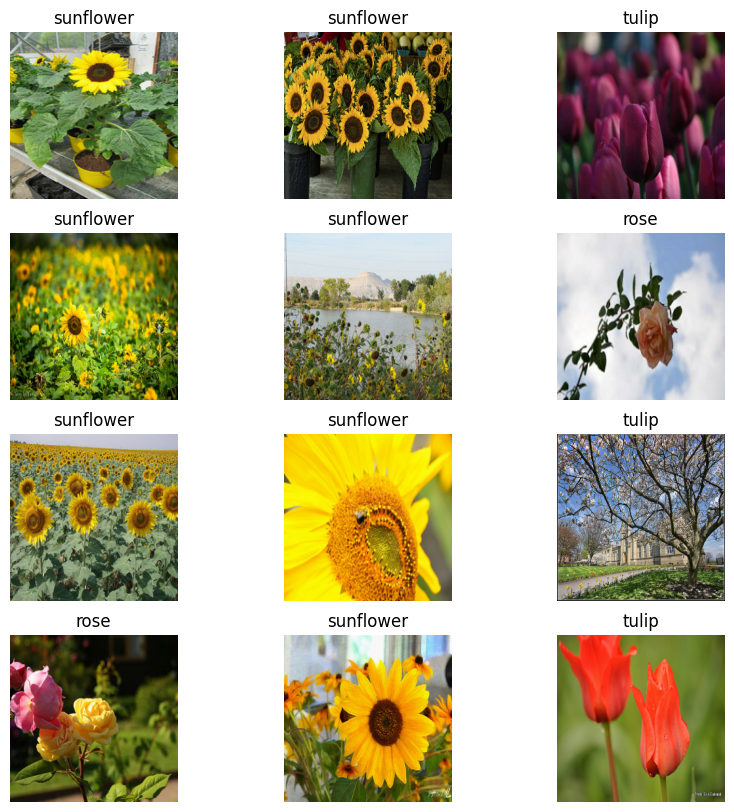

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#Build Model

Based on the size of your input image, design and build your CNN model. You can have as many layers
you think is required for your task.

In [ ]:
def generate_model(image_height, image_width, nchannels, num_classes):
  """
  This function will generate a model with set of hyperparameters defined above.
  Input Args:
  image_height[int] = Height of an image.
  image_width[int] = Width of an image.
  nchannels[int] = Number of channels in image.
  num_classes[int] = Number of classes in dataset.
  Output Args:
  model-> A CNN model.
  """
  model = tf.keras.Sequential([
      # Rescaling and input layer, [For keras the input shape must be(image height, image width, channels)]
      layers.Rescaling(1./255, input_shape=(image_height,image_width, nchannels)),
      # First Block of Convolution and Pooling Operations.
      layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
      layers.MaxPooling2D(),
      # Second Block of Convolution and Pooling Operations.
      layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
      layers.MaxPooling2D(),

      # Fully connected classifier.
      layers.Flatten(),
      layers.Dense(128, activation="relu"),
      layers.Dropout(0.5),
      layers.BatchNormalization(),
      layers.Dense(num_classes, activation='softmax')
  ])
  return model

In [ ]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 131072)           

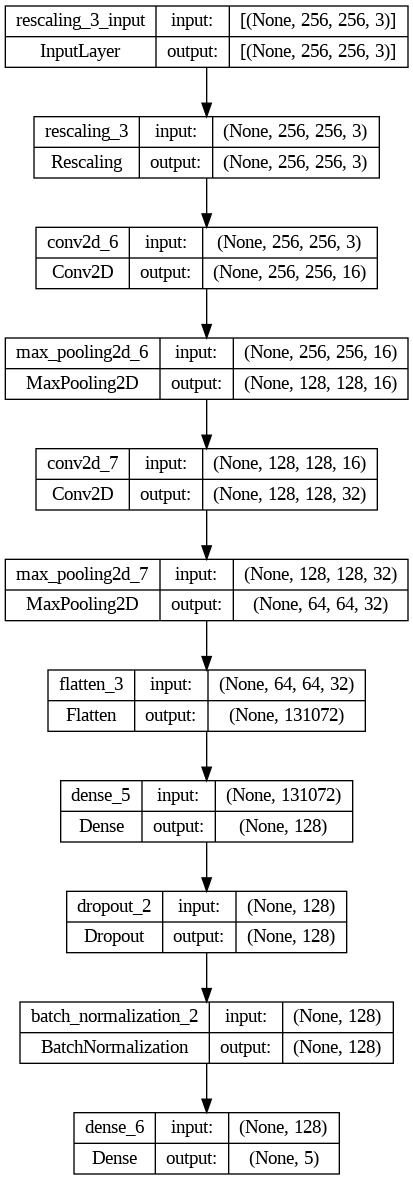

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

#Training of the Model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [ ]:
class Mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy")>0.95):
      print('\nLoss is low so stop training')
      self.model.stop_training =True

In [ ]:
callbacks=Mycallback()

In [ ]:


epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[callbacks]
)


Epoch 1/30
122/122 [==============================] - 28s 192ms/step - loss: 1.5293 - accuracy: 0.3520 - val_loss: 1.2723 - val_accuracy: 0.4346
Epoch 2/30
122/122 [==============================] - 16s 130ms/step - loss: 1.2905 - accuracy: 0.4352 - val_loss: 1.2206 - val_accuracy: 0.4749
Epoch 3/30
122/122 [==============================] - 16s 128ms/step - loss: 1.2318 - accuracy: 0.4741 - val_loss: 1.0832 - val_accuracy: 0.5646
Epoch 4/30
122/122 [==============================] - 19s 148ms/step - loss: 1.1431 - accuracy: 0.5200 - val_loss: 1.0394 - val_accuracy: 0.5955
Epoch 5/30
122/122 [==============================] - 16s 130ms/step - loss: 1.1413 - accuracy: 0.5215 - val_loss: 1.0823 - val_accuracy: 0.5816
Epoch 6/30
122/122 [==============================] - 16s 128ms/step - loss: 1.1093 - accuracy: 0.5372 - val_loss: 1.0000 - val_accuracy: 0.6234
Epoch 7/30
122/122 [==============================] - 16s 129ms/step - loss: 1.0435 - accuracy: 0.5710 - val_loss: 0.9402 - val_ac

#Evaluate the model:

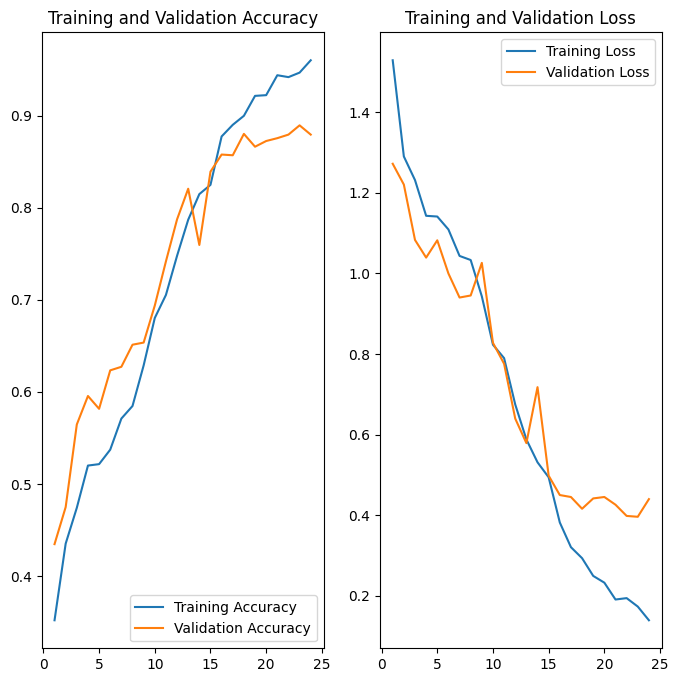

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Adjust the lengths of the arrays to match the actual number of epochs executed
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(val_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

41/41 [==============================] - 3s 71ms/step - loss: 0.4397 - accuracy: 0.8794
Test Loss: 0.43968042731285095
Test Accuracy: 0.8793503642082214


#Results and Prediction:

Found 50 files belonging to 5 classes.
2/2 [==============================] - 0s 20ms/step - loss: 0.2566 - accuracy: 0.9200
Test Loss: 0.2565712034702301
Test Accuracy: 0.9200000166893005
1/1 [==============================] - 0s 93ms/step


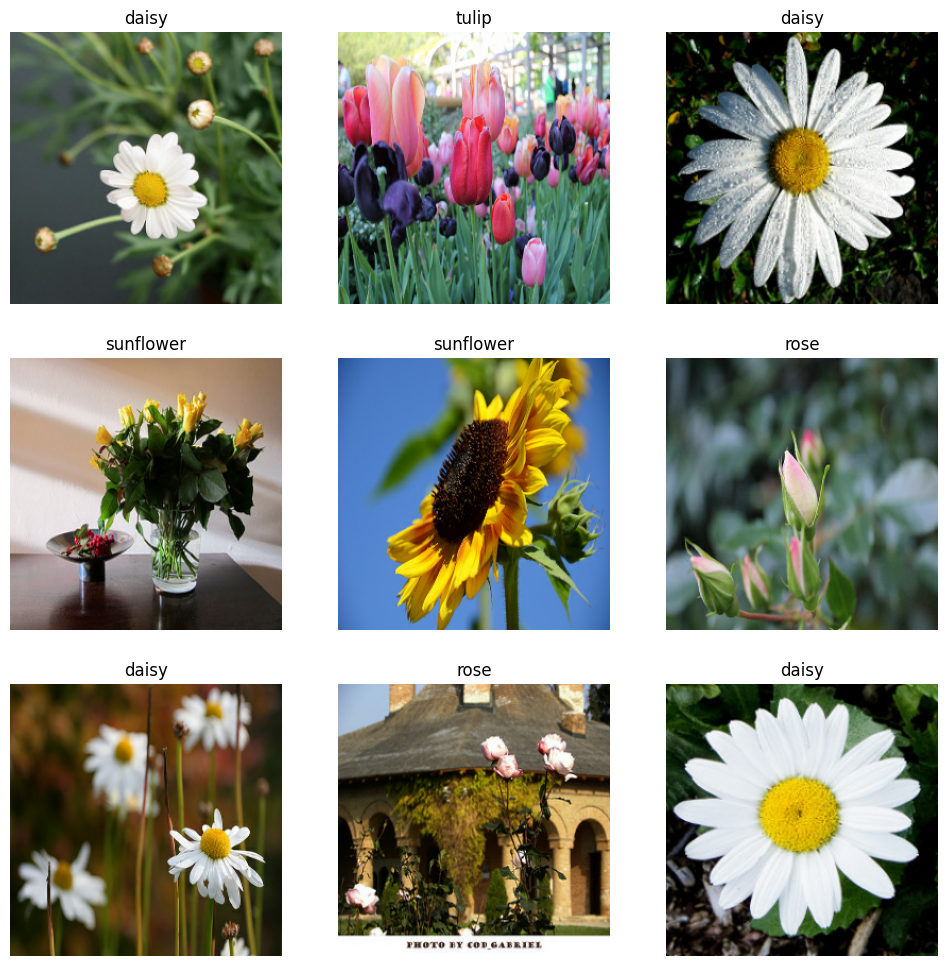

In [ ]:


# Function to predict input examples and plot the results
def predict_and_plot(model, dataset, class_names):
    plt.figure(figsize=(12, 12))
    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[np.argmax(predictions[i])])
            plt.axis("off")

# Create test dataset
test_dir = "/content/drive/MyDrive/Flower Classification/test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict and plot examples from the test set
predict_and_plot(model, test_ds, class_names)


In [ ]:
sunflower_url = "/content/drive/MyDrive/Flower Classification/test/dandelion/13910677675_4900fa3dbf_n.jpg"


img = tf.keras.utils.load_img(
    sunflower_url, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 18ms/step
This image most likely belongs to dandelion with a 40.25 percent confidence.


#Fine-tuning a pre-trained model(Transfer Learning):


In [ ]:
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=5)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=5)))


In [ ]:

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.5)),
resnet_model.add(BatchNormalization()),
resnet_model.add(Dense(5, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                        

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
122/122 [==============================] - 670s 5s/step - loss: 0.5790 - accuracy: 0.8008 - val_loss: 0.2749 - val_accuracy: 0.9087
Epoch 2/10
122/122 [==============================] - 22s 178ms/step - loss: 0.3647 - accuracy: 0.8725 - val_loss: 0.2464 - val_accuracy: 0.9180
Epoch 3/10
122/122 [==============================] - 23s 187ms/step - loss: 0.2890 - accuracy: 0.9011 - val_loss: 0.2051 - val_accuracy: 0.9381
Epoch 4/10
122/122 [==============================] - 27s 219ms/step - loss: 0.2450 - accuracy: 0.9127 - val_loss: 0.1959 - val_accuracy: 0.9381
Epoch 5/10
122/122 [==============================] - 23s 183ms/step - loss: 0.2016 - accuracy: 0.9279 - val_loss: 0.1890 - val_accuracy: 0.9428
Epoch 6/10
122/122 [==============================] - 28s 217ms/step - loss: 0.1979 - accuracy: 0.9284 - val_loss: 0.1705 - val_accuracy: 0.9466
Epoch 7/10
122/122 [==============================] - 27s 216ms/step - loss: 0.1761 - accuracy: 0.9394 - val_loss: 0.1623 - val_accu

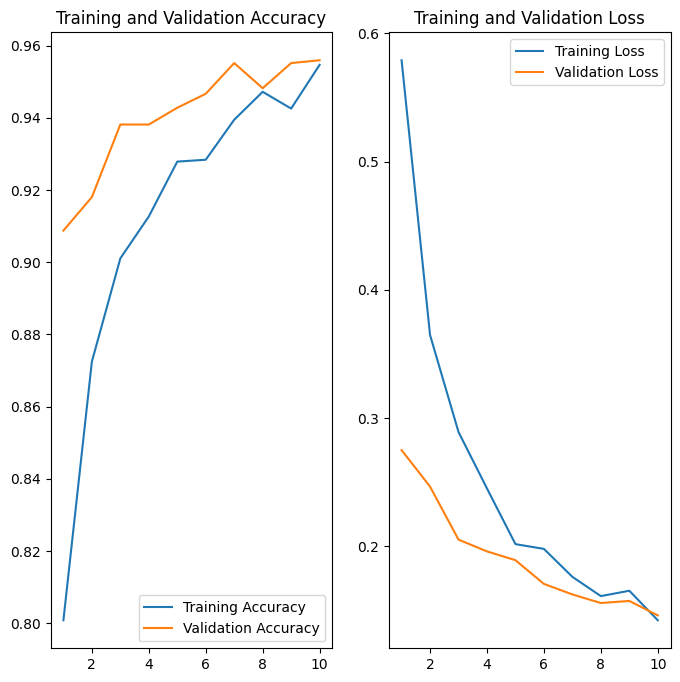

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Adjust the lengths of the arrays to match the actual number of epochs executed
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_url = "/content/drive/MyDrive/Flower Classification/test/roses/21413573151_e681c6a97a.jpg"


img = tf.keras.utils.load_img(
    sunflower_url, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = resnet_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to rose with a 36.34 percent confidence.
